- Documentação.

- Seguir CRISP-DM.

- Descrição do dataset.

- Verificar número de dados faltantes, quantidade de valores únicos, tipos da features, possíveis inconsistências nos dados (ex: string onde deveria ser só número), e dados redundantes (se tem muitas linhas de dados iguais).

- Análise exploratória: distribuição das features, teste de normalidade (ex: Shapiro-Wilk), correlação (pearson para normal e spearman para não-normal), presença de outliers, e o que mais tiver de ideia (ex: plotar gráficos buscando relações entre as features).

- Realizar a limpeza dos dados e outras prepações necessárias no dados para que possam ser usados em um modelo de ML (Sem exemplos porque vai ter que pensar/pesquisar e testar).

- Estudar sobre oversampling e tentar aplicar uma ou mais versões do SMOTE (https://towardsdatascience.com/7-over-sampling-techniques-to-handle-imbalanced-data-ec51c8db349f). Verifique a qualidade do modelo COM e SEM o uso do SMOTE.

- Aplicar PCA para reduzir a dimensionalidade dos dados para 2 dimensões e plotar com a label para ver se encontra algum padrão (não precisa estudar PCA AINDA, é só para ter o primeiro contato).

- **Utilizar classificação para essa base de dados.**

- Criar modelo (escolher uns 3)

- Avaliar modelo (usar Cross-Validation)

- Não obrigatório, mas pode tentar fazer o fine-tuning (otimização de hiperparâmetros) dos modelos

NÃO FOCAR MUITO NA MODELAGEM, MAS NA ANÁLISE EXPLORATÓRIA

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots

from scipy.stats import shapiro, zscore, spearmanr

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from imblearn.over_sampling import BorderlineSMOTE
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix

from sklearn import metrics
from sklearn.metrics import matthews_corrcoef

import random

from pprint import pprint

#Carragamento dos dados

Features
- **Age**: Idade do segurado
- **Sex**: Sexo do segurado
- **Bmi**: IMC do segurado
- **Children**: Número de filhos
- **Smoker**: é fumante (yes ou no)
- **region**: Região do seegurado
- **Charges**: encargos

In [ ]:
raw_insurance_df = pd.read_csv('./insurance.csv')
raw_insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Data Exploration

In [ ]:
raw_insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##Número de dados faltantes

In [ ]:
# Sem dados faltantes
raw_insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Outra visão
raw_insurance_df.isna().describe()

,age,sex,bmi,children,smoker,region,charges
count,1338,1338,1338,1338,1338,1338,1338
unique,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False
freq,1338,1338,1338,1338,1338,1338,1338


##Dados únicos

In [ ]:
raw_insurance_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
raw_insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
unique_values = [[col, raw_insurance_df[col].unique().shape[0]] for col in raw_insurance_df.columns]

In [ ]:
unique_values

[['age', 47],
 ['sex', 2],
 ['bmi', 548],
 ['children', 6],
 ['smoker', 2],
 ['region', 4],
 ['charges', 1337]]

In [ ]:
unique_values = pd.DataFrame(unique_values, columns=['Feature', 'Unique_values'])
unique_values = unique_values.sort_values('Unique_values', ascending=True)
unique_values

,Feature,Unique_values
1,sex,2
4,smoker,2
5,region,4
3,children,6
0,age,47
2,bmi,548
6,charges,1337


In [ ]:
fig = px.bar(unique_values, x='Unique_values', y='Feature', orientation='h', log_x=True)
fig.update_layout(title='Unique values x Featue')
fig.show()

In [ ]:
unique_values = [[col, raw_insurance_df[col].unique()] for col in raw_insurance_df.columns]

In [ ]:
# Verificação rápida dos valores únicos
unique_values

[['age',
  array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
         59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
         20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])],
 ['sex', array(['female', 'male'], dtype=object)],
 ['bmi', array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
         29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
         30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
         28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
         28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
         26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
         24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
         31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
         22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
         32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 2

###Teste utilizando tree chart 
Deu errado

In [ ]:
# unique_values2 = [[col, raw_insurance_df[col].unique()] for col in raw_insurance_df.columns]
# unique_values2

In [ ]:
# col_and_unique_values = pd.DataFrame(unique_values2, columns=['column', 'Unique_Values'])
# col_and_unique_values

In [ ]:
# px.treemap ou px.icicle
# tm_chart = px.treemap(col_and_unique_values, path=['column', 'Unique_Values'])
# tm_chart.show()

##Tipos das features

In [ ]:
raw_insurance_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Tipos objeto pode ser um mix de tipos na coluna ou string
raw_insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
raw_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##Possíveis inconsistências

In [ ]:
# Verifica todos os tipos presentes em uma coluna e a quantidade por tipo
for col in raw_insurance_df.columns:
    print('============ ' + col + ' ============')
    print(raw_insurance_df[col].apply(type).value_counts())

============ age ============
<class 'int'>    1338
Name: age, dtype: int64
============ sex ============
<class 'str'>    1338
Name: sex, dtype: int64
============ bmi ============
<class 'float'>    1338
Name: bmi, dtype: int64
============ children ============
<class 'int'>    1338
Name: children, dtype: int64
============ smoker ============
<class 'str'>    1338
Name: smoker, dtype: int64
============ region ============
<class 'str'>    1338
Name: region, dtype: int64
============ charges ============
<class 'float'>    1338
Name: charges, dtype: int64


## Dados Redundantes

In [ ]:
# Exemplo da verificação. Todos os dados de uma linha devem ser iguais
df_redundante = pd.DataFrame({
    'brand': ['Yum', 'Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df_redundante

,brand,style,rating
0,Yum,cup,4.0
1,Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [ ]:
df_redundante.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [ ]:
duplicated_df = raw_insurance_df.duplicated(keep=False)
duplicated_df

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [ ]:
# Checa a quantidade de valores únicos e a frequência do valor que aparece mais
# existe duas repetições
raw_insurance_df.duplicated(keep=False).describe()

count      1338
unique        2
top       False
freq       1336
dtype: object

In [ ]:
raw_insurance_df[duplicated_df]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


##Distribuição das features

In [ ]:
n_cols = 3
n_rows = (raw_insurance_df.shape[1] // n_cols) + 1

In [ ]:
fig = make_subplots(rows=n_rows, cols=n_cols)

for i, col_name in enumerate(raw_insurance_df.columns):

    row = (i // n_cols) + 1
    col = (i % n_cols) + 1

    fig.add_trace(
        go.Histogram(x=raw_insurance_df[col_name]),
        row=row, col=col
    )

    fig.update_xaxes(title_standoff=10, title_text=col_name, row=row, col=col)
    fig.update_yaxes(title_text='', row=row, col=col)

fig.update_layout(
    title='Data Distribuition',
    bargap=0.1,
    showlegend=False
)

fig.show()

Verificar as features age, bmi e charges, pois estão desbalanceados

In [ ]:
# Pega o máximo e mínimo e cria bin (Regiões) pandas.cut
# Distplot

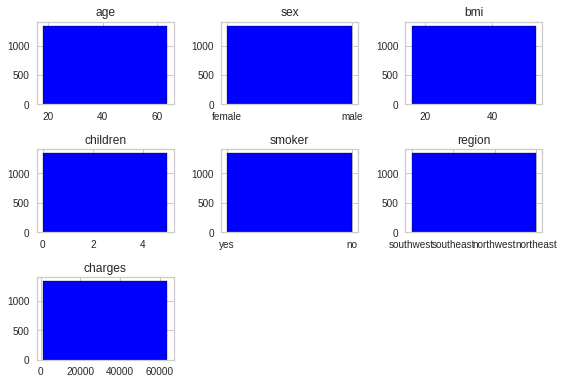

In [ ]:
for i, col_name in enumerate(raw_insurance_df.columns):
    ax = plt.subplot(n_rows, n_cols, i + 1)

    ax.hist(raw_insurance_df[col_name], bins=1, color = 'blue', edgecolor = 'black')

    #Title and labels
    ax.set_title(col_name)

plt.tight_layout()
plt.show()

##Teste de Normalidade

* H0: distribuição dos dados == normal  -> p > 0,05
* H1: distribuição dos dados != normal -> p <= 0,05 





In [ ]:
#Alterando valores categóricos para label encoder

lb_insurance_df = raw_insurance_df.copy()
lb_insurance_df['sex'] = lb_insurance_df['sex'].replace({'female': 0, 'male': 1})
lb_insurance_df['smoker'] = lb_insurance_df['smoker'].replace({'yes': 0, 'no': 1})
lb_insurance_df['region'] = lb_insurance_df['region'].replace({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

In [ ]:
for i, col_name in enumerate(lb_insurance_df.columns):
    w, p = shapiro(lb_insurance_df[col_name])

    print('Teste de normalidade para: ' + col_name + ' w: {0} p: {1}'.format(w, p))
    alpha = 0.05
    if p > alpha:
        print('É normal. Não rejeita hipotese nula')
    else:
        print('Não é normal. Rejeita hipotese nula')
    print('================================================================')

Teste de normalidade para: age w: 0.9446991682052612 p: 5.687479624670986e-22
Não é normal. Rejeita hipotese nula
Teste de normalidade para: sex w: 0.6365700960159302 p: 0.0
Não é normal. Rejeita hipotese nula
Teste de normalidade para: bmi w: 0.9938876032829285 p: 2.609841976664029e-05
Não é normal. Rejeita hipotese nula
Teste de normalidade para: children w: 0.8231803774833679 p: 5.066361280494088e-36
Não é normal. Rejeita hipotese nula
Teste de normalidade para: smoker w: 0.4950445890426636 p: 0.0
Não é normal. Rejeita hipotese nula
Teste de normalidade para: region w: 0.8594433069229126 p: 5.870974576429252e-33
Não é normal. Rejeita hipotese nula
Teste de normalidade para: charges w: 0.814687967300415 p: 1.150477698013898e-36
Não é normal. Rejeita hipotese nula


## Correlação

pearson para normal e spearman para não-normal

---
Correlação positiva:
> - Duas variáveis aumentam ou diminuem juntas (Fazer exercicio aumenta a qualidade de vida)

Correlação negativa:
> - Uma variável aumenta enquanto a outra diminui (Fumar reduz o tempo de vida)




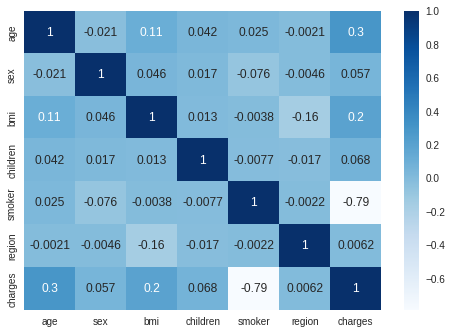

In [ ]:
# Padrão é correlação de Pearson
# Artigo que fala sobre correlação
# https://paulovasconcellos.com.br/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-2e9df83d062a

corr_matrix = lb_insurance_df.corr()
corr_heatmap = sns.heatmap(corr_matrix, annot=True, cmap="Blues")

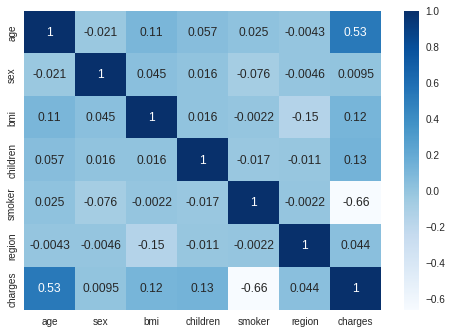

In [ ]:
corr_matrix = lb_insurance_df.corr(method='spearman')
corr_heatmap = sns.heatmap(corr_matrix, annot=True, cmap="Blues")

In [ ]:
scatter_plot = px.scatter_matrix(data_frame=raw_insurance_df, dimensions=['age', 'bmi', 'charges'], color='smoker')
scatter_plot.show()

In [ ]:
scatter_plot = px.scatter_matrix(data_frame=raw_insurance_df, dimensions=['age', 'charges'], color='bmi')
scatter_plot.show()

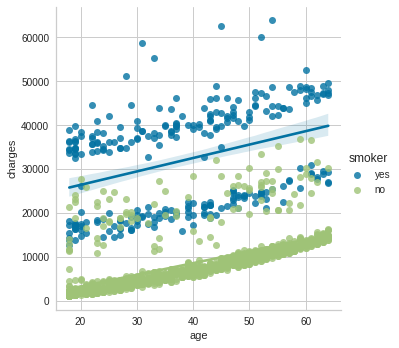

In [ ]:
sns.lmplot(x='age', y='charges', hue='smoker', data=raw_insurance_df)

In [ ]:
fig = px.scatter(raw_insurance_df, x="bmi", y="charges", color="smoker", trendline="ols")
fig.show()

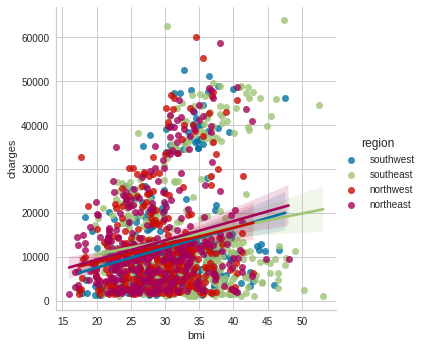

In [ ]:
sns.lmplot(x='bmi', y='charges', hue='region', data=raw_insurance_df)

##Outliers

Algumas explicações sobre outlier: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [ ]:
def boxplot_2d(x, y):
    fig = px.box(raw_insurance_df, x=x, y=y)
    fig.show()

In [ ]:
boxplot_2d('charges', 'sex')

In [ ]:
boxplot_2d('charges', 'region')

In [ ]:
boxplot_2d('charges', 'smoker')

In [ ]:
fig = px.box(raw_insurance_df, y='region')
fig.show()

In [ ]:
# >= 47,41
fig = px.box(raw_insurance_df, y='bmi')
fig.show()

In [ ]:
# 34,61784
fig = px.box(raw_insurance_df, y='charges')
fig.show()

In [ ]:
# Utilização de z-score para detectar outliers
# Qual score eu posso considerar outlier? Geralmente abs(score) > 3
zscore_by_feature = np.abs(zscore(lb_insurance_df))
zscore_by_feature

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905,0.298584
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495,0.953689
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495,0.728675
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915,0.719843
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915,0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.466915,0.220551
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.372326,0.914002
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.438495,0.961596
1336,1.296362,1.010519,0.797813,0.908614,0.507463,1.343905,0.930362


In [ ]:
bmi_outliers_df = zscore_by_feature.loc[abs(zscore_by_feature['bmi'] > 3)]
bmi_outliers_df

,age,sex,bmi,children,smoker,region,charges
116,1.338082,0.989591,3.017861,0.908614,0.507463,0.438495,0.156053
847,1.153959,0.989591,3.234400,0.078767,0.507463,0.438495,0.894831
1047,1.225161,0.989591,3.595298,0.078767,1.970587,0.438495,2.579903
1317,1.509965,0.989591,3.685522,0.908614,0.507463,0.438495,1.000122


In [ ]:
charges_outliers_df = zscore_by_feature.loc[abs(zscore_by_feature['charges'] > 3)]
charges_outliers_df

,age,sex,bmi,children,smoker,region,charges
34,0.797954,0.989591,0.941058,0.078767,1.970587,1.343905,3.132806
543,1.053277,1.010519,2.747188,0.908614,1.970587,0.438495,4.171663
577,0.584350,1.010519,1.219113,0.078767,1.970587,1.372326,3.742159
819,0.441948,1.010519,0.798339,0.908614,1.970587,0.466915,3.458348
1146,1.480485,0.989591,0.350498,0.908614,1.970587,1.343905,3.248148
1230,0.910875,0.989591,0.626913,1.580926,1.970587,0.466915,3.861966
1300,0.412467,0.989591,0.049771,0.908614,1.970587,0.438495,4.074389


#Data Preparation

Data Cleaning
- Remoção de dados duplicados
- Remoção de dados Irreleventes (URLs, HTML tags, Excessive blank space)
- Lidar com valores ausentes
- Filtrar valores discrepantes (remoção de outliers)
- Padronizar o case ex: Categorias
- Converter tipos de dados ex: Número por extenso para numeral

Ler depois: https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4

Regressão logistica para feature selection
https://towardsdatascience.com/feature-selection-using-logistic-regression-model-efc949569f58

In [ ]:
final_df = None

##Remoção dos dados duplicados

In [ ]:
duplicated_df = raw_insurance_df.duplicated(keep=False)
duplicated_df # lista de booleano
raw_insurance_df[duplicated_df]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
duplicated_index = raw_insurance_df[duplicated_df].index
duplicated_index

Int64Index([195, 581], dtype='int64')

In [ ]:
# Dropando linhas duplicadas, os index se mandêm
unduplicated_insurance_df = raw_insurance_df.drop(axis=1, index=duplicated_index)

# Checando se ainda existe valores duplicados
unduplicated_index = unduplicated_insurance_df.duplicated(keep=False)
unduplicated_insurance_df[unduplicated_index]

,age,sex,bmi,children,smoker,region,charges


In [ ]:
print(duplicated_df, unduplicated_index)

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool 0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1336, dtype: bool


In [ ]:
final_df = unduplicated_insurance_df.copy()
final_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##Remoção de outliers

In [ ]:
# Dropando outliers presente na coluna bmi
final_df = final_df.drop(axis=1, index=bmi_outliers_df.index)
final_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Removendo linhas que possue outliers na coluna charges
final_df = final_df.drop(axis=1, index=charges_outliers_df.index)
final_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Tratamento dos dados categóricos
Preciso normalizar os valores de charges?

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc  = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
categorical_cols = final_df.dtypes[(final_df.dtypes != 'int64') & (final_df.dtypes != 'float64')].index
categorical_cols = categorical_cols.delete(1)

In [ ]:
one_df = enc.fit_transform(final_df[categorical_cols])
one_df = pd.DataFrame(one_df)
one_df

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
1320,0.0,1.0,0.0,1.0,0.0,0.0
1321,1.0,0.0,1.0,0.0,0.0,0.0
1322,1.0,0.0,0.0,0.0,1.0,0.0
1323,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# concateno os dois DataFrames e reseto os indexes
ohe_df = pd.concat([final_df.drop(columns=categorical_cols).reset_index(drop=True), one_df], axis=1)
ohe_df['smoker'] = ohe_df['smoker'].replace({'no': 0, 'yes': 1})
ohe_df

,age,bmi,children,smoker,charges,0,1,2,3,4,5
0,19,27.900,0,1,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1320,50,30.970,3,0,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0
1321,18,31.920,0,0,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0
1322,18,36.850,0,0,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0
1323,21,25.800,0,0,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
final_df = None
final_df = ohe_df.copy()
final_df

,age,bmi,children,smoker,charges,0,1,2,3,4,5
0,19,27.900,0,1,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1320,50,30.970,3,0,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0
1321,18,31.920,0,0,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0
1322,18,36.850,0,0,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0
1323,21,25.800,0,0,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0


## Divisão de treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(columns=['smoker']),
                                                    final_df['smoker'],
                                                    test_size=0.3,
                                                    random_state=101)

In [ ]:
train_cost_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_cost_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [ ]:
train_cost_df.shape, test_cost_df.shape

((927, 11), (398, 11))

##Rescaling

- Padronização é mais indicado quando existe outlier na base (Removi outliers usando o zscore)? (fazer teste)

In [ ]:
# SMOTE não aceitou com StandardScaler
train_scaler = MinMaxScaler()
test_scaler = MinMaxScaler()

train_cost_df[train_cost_df.columns] = train_scaler.fit_transform(train_cost_df)
test_cost_df[test_cost_df.columns] = test_scaler.fit_transform(test_cost_df)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [ ]:
train_cost_df

,age,bmi,children,charges,0,1,2,3,4,5,smoker
0,0.521739,0.340704,0.0,0.100047,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.130435,0.337278,0.2,0.237082,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.217391,0.249766,0.6,0.341368,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.043478,0.472438,0.4,0.029813,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.695652,0.292899,0.4,0.601843,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
922,0.891304,0.295858,0.2,0.243358,0.0,1.0,1.0,0.0,0.0,0.0,0.0
923,0.347826,0.168639,0.0,0.069723,0.0,1.0,1.0,0.0,0.0,0.0,0.0
924,0.239130,0.424478,0.2,0.058312,1.0,0.0,0.0,0.0,1.0,0.0,0.0
925,0.717391,0.564933,0.0,0.168436,1.0,0.0,0.0,0.0,1.0,0.0,0.0


##Oversampling

**Testa como classificação**
- SMOTE é em relação as classe de um determinado problema (Problemas de classificação)
- Os dados criados com SMOTE devem ser utilizados apenas para treinar o modelo.

In [ ]:
# Aumentar a quantidade de dados >= 14K?
# Não posso afirmar que essa minha feature está desbalanceada
hist_charges = px.histogram(raw_insurance_df, x='smoker')
hist_charges.show()

In [ ]:
# Adiciona registro para charges > 0.1999 e apenas para os dados de treino
hist_charges = px.histogram(train_cost_df, x='smoker')
hist_charges.show()

In [ ]:
train_cost_df.smoker.value_counts()

0.0    733
1.0    194
Name: smoker, dtype: int64

In [ ]:
# Utilização do Borderline SMOTE
# Não é possível fazer oversampling com os valores de charges (valores continuous)

# =====================================================
# Testar esses dados com classificação
# =====================================================

bsm = BorderlineSMOTE()
x_res, y_res = bsm.fit_resample(train_cost_df.drop(columns=['smoker']),
                                train_cost_df[['smoker']])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [ ]:
y_res.value_counts()

smoker
0.0       733
1.0       733
dtype: int64

In [ ]:
oversampled_final_df = pd.concat([x_res, y_res], axis=1).copy()
oversampled_final_df

,age,bmi,children,charges,0,1,2,3,4,5,smoker
0,0.521739,0.340704,0.000000,0.100047,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.130435,0.337278,0.200000,0.237082,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.217391,0.249766,0.600000,0.341368,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.043478,0.472438,0.400000,0.029813,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.695652,0.292899,0.400000,0.601843,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1461,0.419087,0.292563,0.000000,0.364540,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1462,0.812005,0.595018,0.152935,0.923500,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1463,0.683304,0.300663,0.400000,0.468880,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1464,0.456522,0.343942,0.033796,0.400742,0.0,1.0,1.0,0.0,0.0,0.0,1.0


##PCA
- É para classificação ou posso aplicar para regressão?
    Não importa o problema
- Preciso aplicar PCA também nos dados de teste!?
É necessário dimensionar os dados antes de aplicar o PCA

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [ ]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(train_cost_df.drop(columns=['smoker']))
principal_components

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



array([[ 0.65768515, -0.20752763,  0.07324612],
       [ 0.63977283, -0.3672169 ,  0.76977543],
       [ 0.70910233,  0.79242516,  0.04961317],
       ...,
       [-0.71037755,  0.81666508, -0.07932534],
       [-0.71068125,  0.84155312, -0.09298956],
       [-0.71050573,  0.81566267, -0.07863962]])

In [ ]:
# https://towardsdatascience.com/how-do-you-apply-pca-to-logistic-regression-to-remove-multicollinearity-10b7f8e89f9b
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()
# Utilizaria n = 5 pois a soma das porcentagem são 72%
# Utilizar essas porcentagens após fazer one hot encoder? pois cada elemento do
#   do array é considerado uma feature

Eigenvalues:
[0.50286181 0.26986152 0.24534173]

Variances (Percentage):
[33.66379567 18.06572484 16.42426165]



In [ ]:
principal_df = pd.DataFrame(data=principal_components, columns=['principal_comp_1', 'principal_comp_2', 'principal_comp_3'])
principal_df

,principal_comp_1,principal_comp_2,principal_comp_3
0,0.657685,-0.207528,0.073246
1,0.639773,-0.367217,0.769775
2,0.709102,0.792425,0.049613
3,0.702037,0.804853,0.046433
4,0.649687,-0.357619,0.768787
...,...,...,...
922,0.752370,-0.414651,-0.643812
923,0.744260,-0.433235,-0.645104
924,-0.710378,0.816665,-0.079325
925,-0.710681,0.841553,-0.092990


In [ ]:
reduced_df = pd.concat([principal_df, train_cost_df[['smoker']]], axis=1)
reduced_df

,principal_comp_1,principal_comp_2,principal_comp_3,smoker
0,0.657685,-0.207528,0.073246,0.0
1,0.639773,-0.367217,0.769775,0.0
2,0.709102,0.792425,0.049613,1.0
3,0.702037,0.804853,0.046433,0.0
4,0.649687,-0.357619,0.768787,0.0
...,...,...,...,...
922,0.752370,-0.414651,-0.643812,0.0
923,0.744260,-0.433235,-0.645104,0.0
924,-0.710378,0.816665,-0.079325,0.0
925,-0.710681,0.841553,-0.092990,0.0


In [ ]:
fig = px.scatter(reduced_df, x="principal_comp_1", y="principal_comp_2", color="smoker", trendline="ols")
fig.show()

#Modeling
Os algoritmos escolhidos são:
- SVM
- KNN
- Random forest

###Metodos para Fine-Tuning

In [ ]:
svm_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1.0, 2.0, 3.0]
    }

knn_params = {
    'n_neighbors': [5, 10, 15, 20],
    'leaf_size': [20, 25, 30],
    'metric': ['callable', 'minkowski'],
    'p': [1, 2]
    }

rf_params = {
    'n_estimators': [20, 50, 100, 110, 120, 130],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

In [ ]:
modelos = {
    'SVM': (SVC, svm_params),
    'KNN': (KNeighborsClassifier, knn_params),
    'RF': (RandomForestClassifier, rf_params)
}

In [ ]:
results = {}

In [ ]:
def model_fine_tuning(model, model_params, train_dataframe, model_class):
    """
    Retorna informações de gridSearch

    Parameters
    ----------
    model : Algoritmo
        Instância do algoritmo que se quer trabalhar.
    model_params : Object
        Parametros para fazer o fine-tuning.
    train_dataframe : DataFrame
        DataFrame para executar o fine-tuning.
    model_class : string
        Classe que para classificar os dados.

    """
    grid_search = GridSearchCV(estimator=model, param_grid=model_params, verbose=1);
    dtb_model = grid_search.fit(train_dataframe.drop(columns=[model_class]).values, train_dataframe[model_class].values);

    return dtb_model

In [ ]:
def train_model(model, model_statistics, train_dataframe, valid_dataframe, model_class):
    """
    Treina o modelo e retorna uma tupla de metricas

    Parameters
    ----------
    model : Classe
        Classe do algoritmo.
    model_statistics : Object
        informações da execução do grid search.
    train_dataframe : DataFrame
        DataFrame para executar o treino.
    valid_dataframe : DataFrame
        DataFrame para validar o treinamento
    model_class: string
        Classe que para classificar os dados.
    """
    my_model = model(**model_statistics.best_params_)
    my_model.fit(train_dataframe.drop(columns=[model_class]).values, train_dataframe[model_class].values)

    previsoes_my_model = my_model.predict(valid_dataframe.drop(columns=[model_class]).values)

    matriz_confusao = metrics.confusion_matrix(valid_dataframe[model_class].values, previsoes_my_model).transpose()

    model_metrics = metrics.classification_report(valid_dataframe[model_class].values, previsoes_my_model, digits=3, output_dict=True)

    model_mcc = matthews_corrcoef(valid_dataframe[model_class].values, previsoes_my_model)

    return (matriz_confusao, model_metrics, model_mcc)

In [ ]:
def update_dict(model_results, key, value):
    """
    Atualiza o dicionário de métricas

    Parameters
    ----------
    results : Dict
        Dicionário referênte a cada modelo testado.
    key : string
        Chaves do dicionário
    value : Object
        Resultados para serem salvos no dicionário
    """
    if model_results.get(key):
        model_results[key].append(value)
    else:
        model_results[key] = [value]

In [ ]:
def convert_dict_to_dict_of_dataframes(results_param):
    results_df_dict = {}

    for model_name, value in results_param.items():
        if results_df_dict.get(model_name) == None:
            results_df_dict[model_name] = {}

        results_df_dict[model_name] = pd.DataFrame.from_dict(value)
        results_df_dict[model_name].drop(columns=['matriz_confusao'], axis=1, inplace=True)
        results_df_dict[model_name]['model'] = model_name
    
    return results_df_dict

In [ ]:
def convert_dict_of_dataframe_to_tdataframe(results_df_dict):
    final_df_results = None
    for model_name, value in results_df_dict.items():
        final_df_results = pd.concat([final_df_results, value])

    final_df_results.sort_values(by=['seed'], inplace=True)

    return final_df_results

In [ ]:
def plot_boxplot(df, x, y, color):
    """
    Plota os resultados

    Parameters
    ----------
    df : Dataframe
        Dataframe com os resultados
    x : string
        Nome da coluna do dataframe para ser x
    y : string
        Nome da coluna para ser y
    color : string
        Nome da coluna para ser o color
    """
    fig = px.box(df, x=x, y=y, color=color)
    fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
    fig.show()

##Com SMOTE

###Fine-tuning
> Faz nova divisão entre treino e validação, usa o treino para fazer o fine-tuning. Depois treina o modelo com os dados de treino e avalia com os dados de validação.

> Fiz Fine-tuning em todos os testes dos modelos. Depois fiz novamente ao avaliar o modelo. Talvez não seja uma boa ideia para base de dados muito grande

###Divisão entre teste e validação

In [ ]:
# Divisão dos dados de treino (oversampled) em treino e validação
def split_oversampled_data(seed):
    X_train, X_valid, y_train, y_valid = train_test_split(oversampled_final_df.drop(columns=['smoker']),
                                                        oversampled_final_df['smoker'],
                                                        test_size=0.3,
                                                        random_state=seed)
    
    cost_sub_train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
    cost_valid_df = pd.concat([X_valid, y_valid], axis=1).reset_index(drop=True)

    return cost_sub_train_df, cost_valid_df

###Fine-tuning

In [ ]:
results = {}

In [ ]:
for i in range(10):
    seed = random.randint(1, 1001)
    sub_train_cost_df, valid_cost_df = split_oversampled_data(seed)
    for model_name, value in modelos.items():
        model = value
        grid_search_stats = model_fine_tuning(model[0](), model[1], sub_train_cost_df, 'smoker')

        model_metrics = train_model(model[0], grid_search_stats, sub_train_cost_df, valid_cost_df, 'smoker')

        if results.get(model_name) == None:
            results[model_name] = {}

        update_dict(results[model_name], 'seed', seed)
        update_dict(results[model_name], 'matriz_confusao', model_metrics[0])
        # Metrics
        update_dict(results[model_name], 'precision', model_metrics[1]['macro avg']['precision'])
        update_dict(results[model_name], 'f1score', model_metrics[1]['macro avg']['f1-score'])
        update_dict(results[model_name], 'recall', model_metrics[1]['macro avg']['recall'])
        #==============
        #update_dict(results[model_name], 'metrics', model_metrics[1]['macro avg'])
        update_dict(results[model_name], 'mcc', model_metrics[2])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
pprint(results)

{'KNN': {'f1score': [0.959077380952381,
                     0.9634179293716614,
                     0.9590062111801243,
                     0.9408100333202261,
                     0.9633019871139933,
                     0.9611708947824688,
                     0.9338417906268958,
                     0.9520027427004172,
                     0.9406688241639699,
                     0.9445564516129032],
         'matriz_confusao': [array([[215,   2],
       [ 16, 207]]),
                             array([[195,   1],
       [ 15, 229]]),
                             array([[221,   0],
       [ 18, 201]]),
                             array([[198,   7],
       [ 19, 216]]),
                             array([[191,   3],
       [ 13, 233]]),
                             array([[196,   0],
       [ 17, 227]]),
                             array([[192,   4],
       [ 25, 219]]),
                             array([[193,   1],
       [ 20, 226]]),
                             array([[1

###convert dict to dataframe

In [ ]:
results_df_dict = convert_dict_to_dict_of_dataframes(results)

In [ ]:
results_df_dict

{'SVM':    seed  precision   f1score    recall       mcc model
 0   586   0.975000  0.974984  0.976190  0.951190   SVM
 1   446   0.981172  0.979456  0.978571  0.959739   SVM
 2   173   0.971831  0.972632  0.974895  0.946721   SVM
 3   828   0.974468  0.972682  0.972350  0.946816   SVM
 4   221   0.977028  0.974781  0.973372  0.950392   SVM
 5   471   0.970954  0.968052  0.967136  0.938083   SVM
 6   983   0.963911  0.961275  0.960891  0.924798   SVM
 7   478   0.970954  0.968052  0.967136  0.938083   SVM
 8   428   0.968944  0.968158  0.968014  0.936958   SVM
 9   541   0.971943  0.970142  0.968848  0.940786   SVM,
 'KNN':    seed  precision   f1score    recall       mcc model
 0   586   0.959517  0.959077  0.960583  0.920100   KNN
 1   446   0.966711  0.963418  0.962112  0.928812   KNN
 2   173   0.958904  0.959006  0.962343  0.921241   KNN
 3   828   0.942501  0.940810  0.940526  0.883025   KNN
 4   221   0.965845  0.963302  0.961781  0.927618   KNN
 5   471   0.965164  0.961171  0.

In [ ]:
final_df_results = convert_dict_of_dataframe_to_tdataframe(results_df_dict)

In [ ]:
final_df_results.shape

(30, 6)

In [ ]:
fig = px.box(final_df_results, x="model", y="mcc")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
plot_df = pd.melt(final_df_results, id_vars=['seed', 'model'], value_vars=['precision','f1score', 'recall', 'mcc'])
plot_df

,seed,model,variable,value
0,173,KNN,precision,0.958904
1,173,SVM,precision,0.971831
2,173,RF,precision,0.964954
3,221,KNN,precision,0.965845
4,221,RF,precision,0.983012
...,...,...,...,...
115,828,RF,mcc,0.946816
116,828,SVM,mcc,0.946816
117,983,SVM,mcc,0.924798
118,983,RF,mcc,0.941655


In [ ]:
plot_boxplot(plot_df, "model", "value", "variable")

In [ ]:
# Separar por métricas
def plot_scartter(dataframe, x, metricas, model_column):
    """
    Monta char com a combinação de métricas

    Parameters
    ----------
    dataframe : DataFrame
        DataFrame com as métricas.
    x : string
        Coluna com os valores que serão passados para o eixo x
    metricas : Array<string>
        Métricas que serão plotadas
    model_column : string
        Nome da coluna que contém o tipo de modelo para um determinado registro
    """

    colors = ['crimson', 'purple', 'green', 'azure']
    dashes=['solid', 'dot', 'dash', 'dashdot']

    fig = go.Figure()

    unique_models = dataframe[model_column].unique()
    # final_df_results[final_df_results['model']== 'KNN']['recall']
    for index_c, model in enumerate(unique_models):
        for index_d, metrica in enumerate(metricas):
            fig.add_trace(go.Scatter(x=dataframe[dataframe[model_column]==model][x], y=dataframe[dataframe[model_column]==model][metrica], name=model+'_'+metrica,
                            line=dict(color=colors[index_c], dash=dashes[index_d])))
    fig.show()

In [ ]:
plot_scartter(final_df_results, 'seed', ['precision', 'f1score', 'recall', 'mcc'], 'model')

##Sem SMOTE

####Fine-tuning

####Divisão entre treino e teste

In [ ]:
def split_data_without_oversampling(seed):
    X_train, X_valid, y_train, y_valid = train_test_split(train_cost_df.drop(columns=['smoker']),
                                                        train_cost_df['smoker'],
                                                        test_size=0.3,
                                                        random_state=seed)
    
    sub_train_cost_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
    valid_cost_df = pd.concat([X_valid, y_valid], axis=1).reset_index(drop=True)

    return sub_train_cost_df, valid_cost_df

### Fine-Tuning

In [ ]:
results_without_oversampling = {}

In [ ]:
for i in range(10):
    seed = random.randint(1, 1001)
    sub_train_cost_df, valid_cost_df = split_data_without_oversampling(seed)
    for model_name, value in modelos.items():
        model = value
        grid_search_stats = model_fine_tuning(model[0](), model[1], sub_train_cost_df, 'smoker')

        model_metrics = train_model(model[0], grid_search_stats, sub_train_cost_df, valid_cost_df, 'smoker')

        if results_without_oversampling.get(model_name) == None:
            results_without_oversampling[model_name] = {}

        update_dict(results_without_oversampling[model_name], 'seed', seed)
        update_dict(results_without_oversampling[model_name], 'matriz_confusao', model_metrics[0])
        # Metrics
        update_dict(results_without_oversampling[model_name], 'precision', model_metrics[1]['macro avg']['precision'])
        update_dict(results_without_oversampling[model_name], 'f1score', model_metrics[1]['macro avg']['f1-score'])
        update_dict(results_without_oversampling[model_name], 'recall', model_metrics[1]['macro avg']['recall'])
        #==============
        #update_dict(results[model_name], 'metrics', model_metrics[1]['macro avg'])
        update_dict(results_without_oversampling[model_name], 'mcc', model_metrics[2])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Fitting 5 folds for each of 108 candidates, totalling 540 fits


### Convert dict to dataframe

In [ ]:
results_df_dict = convert_dict_to_dict_of_dataframes(results_without_oversampling)

In [ ]:
final_df_results = convert_dict_of_dataframe_to_tdataframe(results_df_dict)

In [ ]:
plot_df = pd.melt(final_df_results, id_vars=['seed', 'model'], value_vars=['precision','f1score', 'recall', 'mcc'])
plot_df

,seed,model,variable,value
0,2,KNN,precision,0.854530
1,2,RF,precision,0.911531
2,2,SVM,precision,0.895161
3,50,SVM,precision,0.912162
4,50,KNN,precision,0.863687
...,...,...,...,...
115,962,KNN,mcc,0.674047
116,962,SVM,mcc,0.883345
117,972,SVM,mcc,0.883692
118,972,RF,mcc,0.883692


In [ ]:
plot_boxplot(plot_df, "model", "value", "variable")

#Evaluation
- Utilizar o k-fold cross validation

In [ ]:
rf_param_grid = {
    'n_estimators': [20, 50, 100, 110, 120],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_param_grid);
dtb_rf = grid_search.fit(oversampled_final_df.drop(columns=['smoker']), oversampled_final_df['smoker']);
best_params = grid_search.best_params_
best_result = grid_search.best_score_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names o

In [ ]:
print(best_params)
print(best_result)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
0.9781755705695246


In [ ]:
resultados_random_forest = []

# train_cost_df, test_cost_df
skfold = StratifiedKFold(n_splits=5)

random_forest_titanic = RandomForestClassifier(**dtb_rf.best_params_)
scores_RF = cross_val_score(random_forest_titanic, oversampled_final_df.drop(columns=['smoker']), oversampled_final_df['smoker'], cv=skfold)
resultados_random_forest.append(scores_RF.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names o

In [ ]:
print('média de resultados: ',resultados_random_forest)

média de resultados:  [0.9768103828562144]


In [ ]:
# Random_state = 101 foi o melhor valor. Adiciono esse valor ao fine tuning? Existe melhor forma de encontrar o melhor valor?
random_forest = RandomForestClassifier(**dtb_rf.best_params_, random_state=101)
random_forest.fit(oversampled_final_df.drop(columns=['smoker']), oversampled_final_df['smoker'])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



RandomForestClassifier(criterion='entropy', n_estimators=120, random_state=101)

In [ ]:
rf_predictions = random_forest.predict(test_cost_df.drop(columns=['smoker']))

matriz_confusao = metrics.confusion_matrix(test_cost_df['smoker'], rf_predictions).transpose()

print(matriz_confusao)

print(metrics.classification_report(test_cost_df['smoker'], rf_predictions, digits=3))
m = metrics.classification_report(test_cost_df['smoker'], rf_predictions, digits=3, output_dict=True)

print("MCC: ", matthews_corrcoef(test_cost_df['smoker'], rf_predictions))

[[306   1]
 [ 20  71]]
              precision    recall  f1-score   support

         0.0      0.997     0.939     0.967       326
         1.0      0.780     0.986     0.871        72

    accuracy                          0.947       398
   macro avg      0.888     0.962     0.919       398
weighted avg      0.958     0.947     0.950       398

MCC:  0.8476466823050117


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [ ]:
m['macro avg']

{'precision': 0.888481225614776,
 'recall': 0.9623807089297887,
 'f1-score': 0.9189951443607711,
 'support': 398}